In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# Read thermal history data
redshift, temperature = np.loadtxt('./thermal_history.csv', delimiter=', ', unpack=True)

<Figure size 432x288 with 0 Axes>

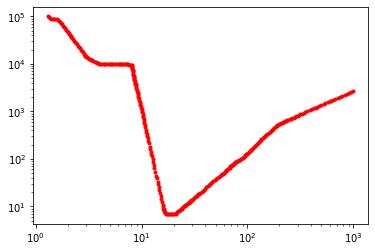

In [41]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_xscale('log')
# thermal history data point from digitizer
axes.plot(redshift, temperature, 'r.')



<Figure size 432x288 with 0 Axes>

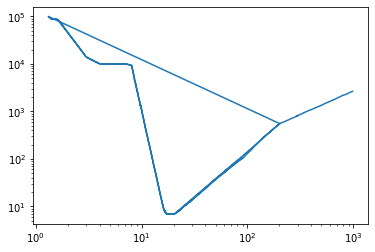

In [42]:
# interpolation from pyplot
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_xscale('log')
axes.plot(redshift, temperature)

<Figure size 432x288 with 0 Axes>

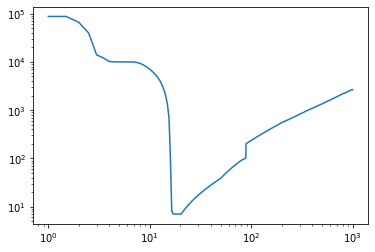

In [40]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_xscale('log')

# interpolation from np.interp
grid = np.linspace(1, 1000, 2000)
axes.plot(grid, np.interp(grid, redshift, temperature), '-')